### Code Block Description: Genetic Algorithm Implementation

This code block defines and implements a **Genetic Algorithm (GA)** designed to solve optimization problems. Below are the key components:

#### 1. **Class `GA_Functions`**
This class encapsulates the entire functionality of the genetic algorithm.  
- **Constructor Parameters (`__init__`)**:
  - `num_bits`: Number of bits used to represent each variable.
  - `value_ranges`: Real value ranges for each variable.
  - `fitness_function`: The objective function to be optimized.
  - `population`, `mutation`, `elite`, `optimization_type`, `generations`: Algorithm configuration parameters.
- **Attributes and Methods**:
  - **`initialize_population`**: Generates an initial population of chromosomes in binary representation.
  - **`binary_to_real` and `real_to_binary`**: Convert between binary and real representations.
  - **`evaluate_population`**: Evaluates the fitness of each individual in the population using the objective function.
  - **`selection`**: Selects the best individuals based on fitness.
  - **`crossover`**: Performs crossover between parents to generate offspring.
  - **`mutate`**: Applies mutations to chromosomes.
  - **`genetic_algorithm`**: Executes the complete genetic algorithm flow (initialization, evaluation, selection, crossover, mutation, iteration).

#### 2. **Objective Functions**
- **`beale_function`**: Evaluates the Beale function, which has a global minimum at `(3, 0.5)`.
- **`easom_function`**: Evaluates the Easom function, with a global minimum at `(π, π)`.

#### 3. **Main Workflow (`__main__`)**
Two instances of the `GA_Functions` class are configured and executed:
1. **Optimization of the Beale Function**:
   - Search space: `[-4.5, 4.5]` for both variables.
   - Output: The best solution found (`x` and `y` values) and the minimum function value.
2. **Optimization of the Easom Function**:
   - Search space: `[-5, 5]` for both variables.
   - Output: The best solution found and the minimum function value.

#### 4. **Results**
The genetic algorithm finds solutions close to the global minimum for both functions, demonstrating its effectiveness in solving continuous optimization problems.

#### Usage
Run the script to observe the optimization results for the Beale and Easom functions. The code allows customization of parameters such as value ranges, the objective function, and GA hyperparameters to conduct experiments.

In [1]:
import random
import numpy as np

class GA_Functions:
    def __init__(self,
                 num_bits,
                 value_ranges,
                 fitness_function,
                 population=100,
                 mutation=0.1,
                 elite=10,
                 optimization_type='min',
                 generations=100):
        if num_bits < 1:
            raise ValueError('Invalid number of bits per variable')
        self.num_bits = num_bits
        if optimization_type != 'min' and optimization_type != 'max':
            raise ValueError('Invalid evaluation type')
        self.optimization_type = optimization_type
        if population < 1:
            raise ValueError('Invalid population size')
        self.population_size = population  
        if mutation < 0 or mutation > 1:
            raise ValueError('Invalid mutation rate')
        self.mutation = mutation
        if elite < 0 or elite > population:
            raise ValueError('Invalid elite size')
        self.elite = elite
        if generations < 1:
            raise ValueError('Invalid number of generations')
        self.generations = generations

        self.value_ranges = value_ranges
        self.fitness_function = fitness_function
        self.num_variables = len(value_ranges)
        self.total_bits = num_bits * self.num_variables
        self.population = []
        self.best_individual = None
        self.best_fitness = None

    def initialize_population(self):
        population = []
        for i in range(self.population_size):
            individual = ''
            for j in range(self.num_variables):
                value = random.uniform(self.value_ranges[j][0], self.value_ranges[j][1])
                individual += self.real_to_binary(value, self.value_ranges[j])
            population.append(individual)
        self.population = population

    def binary_to_real(self, binary, value_range):
        max_int = 2**self.num_bits - 1
        integer_value = int(binary, 2)
        real_value = value_range[0] + (integer_value / max_int) * (value_range[1] - value_range[0])
        return real_value

    def real_to_binary(self, value, value_range):
        max_int = 2**self.num_bits - 1
        normalized_value = int((value - value_range[0]) / (value_range[1] - value_range[0]) * max_int)
        return format(normalized_value, f'0{self.num_bits}b')

    def evaluate_population(self):
        evaluated_population = []
        for individual in self.population:
            values = []
            for i in range(self.num_variables):
                start = i * self.num_bits
                end = start + self.num_bits
                binary_str = individual[start:end]
                value = self.binary_to_real(binary_str, self.value_ranges[i])
                values.append(value)
            fitness = self.fitness_function(*values)
            evaluated_population.append((individual, fitness))
        return evaluated_population  

    def selection(self, evaluated_population):
        if self.optimization_type == 'min':
            evaluated_population = sorted(evaluated_population, key=lambda x: x[1])
        else:
            evaluated_population = sorted(evaluated_population, key=lambda x: x[1], reverse=True)
        return evaluated_population[:self.elite]

    def crossover(self, parents):
        children = []
        parent_individuals = [p[0] for p in parents] 
        for _ in range(self.population_size - self.elite):
            parent1, parent2 = random.sample(parent_individuals, 2)
            crossover_point = random.randint(1, self.total_bits - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            children.append(child)
        return children 
    
    def mutate(self, individual):
        individual = list(individual)
        for i in range(len(individual)):
            if random.random() < self.mutation:
                individual[i] = '1' if individual[i] == '0' else '0'
        return ''.join(individual)

    def genetic_algorithm(self):
        self.initialize_population()
        for gen in range(self.generations):
            evaluated_population = self.evaluate_population()
            parents = self.selection(evaluated_population)
            children = self.crossover(parents)
            for i in range(len(children)):
                children[i] = self.mutate(children[i])
            self.population = [p[0] for p in parents] + children 
            evaluated_population = self.evaluate_population()
            if self.optimization_type == 'min':
                best_individual, best_fitness = min(evaluated_population, key=lambda x: x[1])
                if self.best_fitness is None or best_fitness < self.best_fitness:
                    self.best_individual = best_individual
                    self.best_fitness = best_fitness
            else:
                best_individual, best_fitness = max(evaluated_population, key=lambda x: x[1])
                if self.best_fitness is None or best_fitness > self.best_fitness:
                    self.best_individual = best_individual
                    self.best_fitness = best_fitness
        return self.best_individual, self.best_fitness

def beale_function(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def easom_function(x, y):
    return -np.cos(x)*np.cos(y)*np.exp(-((x-np.pi)**2+(y-np.pi)**2))

if __name__ == '__main__':
    main = GA_Functions(
        num_bits=10,
        value_ranges=[(-4.5, 4.5), (-4.5, 4.5)],
        fitness_function=beale_function,
        optimization_type='min',
        generations=200 
    )
    best_individual, best_fitness = main.genetic_algorithm()
    x_best = main.binary_to_real(best_individual[:10], main.value_ranges[0])
    y_best = main.binary_to_real(best_individual[10:], main.value_ranges[1])
    print(f"Best individual = ({x_best}, {y_best}), Best value = {best_fitness}, Beale")

    main = GA_Functions(
        num_bits=10,
        value_ranges=[(-5, 5), (-5, 5)],  
        fitness_function=easom_function,
        optimization_type='min',
        generations=200 
    )
    best_individual, best_fitness = main.genetic_algorithm()
    x_best = main.binary_to_real(best_individual[:10], main.value_ranges[0])
    y_best = main.binary_to_real(best_individual[10:], main.value_ranges[1])
    print(f"Best individual = ({x_best}, {y_best}), Best value = {best_fitness}", "Easom")

Best individual = (2.986803519061584, 0.497067448680351), Best value = 3.118564398326282e-05, Beale
Best individual = (3.142717497556207, 3.142717497556207), Best value = -0.9999962041850912 Easom


### Code Block Description: Genetic Algorithm for Travelling Salesman Problem (TSP)

This code block implements a **Genetic Algorithm (GA)** to solve the Travelling Salesman Problem (TSP), finding the shortest path to visit a set of nodes. Below are the key components:

#### 1. **Class `GA_TSP`**
Encapsulates the functionality of the genetic algorithm tailored for TSP.

- **Constructor Parameters (`__init__`)**:
  - `nodes`: List of coordinates representing the nodes to visit.
  - `population_size`, `mutation_rate`, `crossover_rate`, `elite_size`, `generation_size`: GA configuration parameters.

- **Attributes and Methods**:
  - **`calculate_distance_matrix`**: Computes pairwise distances between all nodes.
  - **`initialize_population`**: Generates a random initial population of tours (node permutations).
  - **`evaluate_population`**: Calculates the total distance for each tour in the population.
  - **`selection`**: Selects the best tours based on fitness (shortest distance).
  - **`crossover`**: Creates offspring by combining segments from two parent tours.
  - **`mutate`**: Introduces random swaps in a tour to maintain diversity.
  - **`evolve`**: Executes the GA flow for the specified number of generations, returning the best tour and its fitness.

#### 2. **Utility Functions**
- **`generate_nodes`**: Creates a random set of nodes within a defined area.
- **`generate_grid`**: Creates a grid-based set of nodes with fixed spacing.
- **`save_nodes_to_csv`**: Saves the node coordinates to a CSV file.

#### 3. **Main Workflow (`main`)**
Tests the `GA_TSP` class on various TSP cases:
1. **Random Graph**: Nodes are placed randomly within a 100x100 area.
2. **Grid Graphs**: Nodes are arranged in grid configurations (e.g., 5x5, 10x10, 15x15 grids).

- **Parameter Tuning**:
  - Iterates through combinations of GA parameters such as population size, mutation rate, crossover rate, and elite size.
  - Records the results and identifies the best parameter configuration.

- **Output**:
  - Saves the node coordinates and results (e.g., best fitness, traversal order) to CSV files.
  - Displays the best tour and associated parameters for each case.

#### 4. **Results**
- Provides the shortest path for TSP instances with varying node configurations.
- Evaluates and compares the impact of different GA parameter combinations.

#### Usage
Run the script to test the genetic algorithm on different TSP scenarios. The code allows customization of parameters and supports saving results for further analysis.

In [ ]:
import random
import csv
import itertools
import time

random.seed(42)
class GA_TSP:
    def __init__(self,
                 nodes,
                 population_size=100,
                 mutation_rate=0.01,
                 crossover_rate=0.8,
                 elite_size=10,
                 generation_size=500):
        if nodes is None:
            raise ValueError("nodes is None")
        self.nodes = nodes
        if population_size < 1:
            raise ValueError("population_size < 1")
        self.population_size = population_size
        if mutation_rate < 0 or mutation_rate > 1:
            raise ValueError("mutation_rate < 0 or mutation_rate > 1")
        self.mutation_rate = mutation_rate
        if crossover_rate < 0 or crossover_rate > 1:
            raise ValueError("crossover_rate < 0 or crossover_rate > 1")
        self.crossover_rate = crossover_rate
        if elite_size < 0 or elite_size > population_size:
            raise ValueError("elite_size < 0 or elite_size > population_size")
        self.elite_size = elite_size
        if generation_size < 1:
            raise ValueError("generation_size < 1")
        self.generation_size = generation_size
        self.population = []
        self.best_individual = None
        self.best_fitness = None
        self.distance_matrix = self.calculate_distance_matrix()

    def calculate_distance_matrix(self):
        num_nodes = len(self.nodes)
        distance_matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
        for i in range(num_nodes):
            for j in range(num_nodes):
                distance_matrix[i][j] = ((self.nodes[i][0] - self.nodes[j][0])**2 + (self.nodes[i][1] - self.nodes[j][1])**2)**0.5
        return distance_matrix

    def initialize_population(self):
        self.population = []
        base_individual = list(range(len(self.nodes)))
        for _ in range(self.population_size):
            individual = base_individual[:]
            random.shuffle(individual)
            self.population.append(individual)

    def evaluate_population(self):
        fitness = []
        for individual in self.population:
            total_distance = 0
            for i in range(len(individual) - 1):
                total_distance += self.distance_matrix[individual[i]][individual[i+1]]
            total_distance += self.distance_matrix[individual[-1]][individual[0]]
            fitness.append(total_distance)
        return fitness

    def selection(self, fitness):
        fitness_with_index = [(index, fit) for index, fit in enumerate(fitness)]
        fitness_with_index.sort(key=lambda x: x[1])
        selected_indices = [index for index, fit in fitness_with_index[:self.elite_size]]
        selected_individuals = [self.population[index] for index in selected_indices]
        return selected_individuals

    def crossover(self, parent1, parent2):
        size = len(parent1)
        child = [-1] * size
        start_pos = random.randint(0, size - 1)
        end_pos = random.randint(start_pos, size - 1)
        child[start_pos:end_pos + 1] = parent1[start_pos:end_pos + 1]
        p2_current_index = 0
        for i in range(size):
            if child[i] == -1:
                while parent2[p2_current_index] in child:
                    p2_current_index += 1
                child[i] = parent2[p2_current_index]
                p2_current_index += 1
        return child

    def mutate(self, individual):
        for swapped in range(len(individual)):
            if random.random() < self.mutation_rate:
                swap_with = random.randint(0, len(individual) - 1)
                individual[swapped], individual[swap_with] = individual[swap_with], individual[swapped]
        return individual

    def evolve(self):
        self.initialize_population()
        for generation in range(self.generation_size):
            fitness = self.evaluate_population()
            elite_individuals = self.selection(fitness)
            new_population = elite_individuals[:]
            while len(new_population) < self.population_size:
                if random.random() < self.crossover_rate:
                    parent1 = random.choice(elite_individuals)
                    parent2 = random.choice(elite_individuals)
                    child = self.crossover(parent1, parent2)
                else:
                    child = random.choice(self.population)[:]
                child = self.mutate(child)
                new_population.append(child)
            self.population = new_population
        fitness = self.evaluate_population()
        best_index = fitness.index(min(fitness))
        self.best_individual = self.population[best_index]
        self.best_fitness = fitness[best_index]
        return self.best_individual, self.best_fitness

def generate_nodes(num_nodes, area=100):
    nodes = []
    for _ in range(num_nodes):
        nodes.append((random.uniform(0, area), random.uniform(0, area)))
    return nodes

def generate_grid(grid_size, spacing=10):
    nodes = []
    for i in range(grid_size):
        for j in range(grid_size):
            nodes.append((i * spacing, j * spacing))
    return nodes

def save_nodes_to_csv(nodes, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['node_index', 'x', 'y'])
        for index, (x, y) in enumerate(nodes):
            writer.writerow([index, x, y])

def main():
    population_sizes = [50, 100, 200]
    mutation_rates = [0.01, 0.05, 0.1]
    crossover_rates = [0.6, 0.8, 1.0]
    elite_sizes = [5, 10, 20]
    generation_sizes = [500, 1000]
    cases = [
        {
            'name': 'Random_Graph_100x100',
            'nodes': generate_nodes(100),
            'num_nodes': 100
        },
        {
            'name': 'Grid_Graph_25_Nodes',
            'nodes': generate_grid(5, spacing=10),
            'num_nodes': 25
        },
        {
            'name': 'Grid_Graph_100_Nodes',
            'nodes': generate_grid(10, spacing=10),
            'num_nodes': 100
        },
        {
            'name': 'Grid_Graph_225_Nodes',
            'nodes': generate_grid(15, spacing=10),
            'num_nodes': 225
        }
    ]

    for case in cases:
        print(f"\nSolving case: {case['name']} with {case['num_nodes']} nodes")
        nodes_csv_file = f"nodes_{case['name']}.csv"
        save_nodes_to_csv(case['nodes'], nodes_csv_file)
        print(f"Nodes saved in '{nodes_csv_file}'")
        results = []
        parameter_combinations = list(itertools.product(population_sizes, mutation_rates, crossover_rates, elite_sizes, generation_sizes))
        total_combinations = len(parameter_combinations)
        print(f"Total parameter combinations: {total_combinations}")
        start_time = time.time()
        best_overall_fitness = float('inf')
        best_overall_individual = None
        best_overall_params = None

        for idx, (population_size, mutation_rate, crossover_rate, elite_size, generation_size) in enumerate(parameter_combinations):
            if elite_size >= population_size:
                continue
            print(f"\nRunning combination {idx + 1}/{total_combinations}:")
            print(f"Population: {population_size}, Mutation: {mutation_rate}, Crossover: {crossover_rate}, Elite: {elite_size}, Generations: {generation_size}")
            ga = GA_TSP(case['nodes'],
                        population_size=population_size,
                        mutation_rate=mutation_rate,
                        crossover_rate=crossover_rate,
                        elite_size=elite_size,
                        generation_size=generation_size)
            run_start_time = time.time()
            best_individual, best_fitness = ga.evolve()
            run_end_time = time.time()
            run_time = run_end_time - run_start_time
            results.append({
                'population_size': population_size,
                'mutation_rate': mutation_rate,
                'crossover_rate': crossover_rate,
                'elite_size': elite_size,
                'generation_size': generation_size,
                'best_fitness': best_fitness,
                'run_time': run_time,
                'best_individual': ','.join(map(str, best_individual))
            })
            if best_fitness < best_overall_fitness:
                best_overall_fitness = best_fitness
                best_overall_individual = best_individual
                best_overall_params = {
                    'population_size': population_size,
                    'mutation_rate': mutation_rate,
                    'crossover_rate': crossover_rate,
                    'elite_size': elite_size,
                    'generation_size': generation_size
                }

        end_time = time.time()
        total_time = end_time - start_time
        print(f"\nTotal execution time for {case['name']}: {total_time:.2f} seconds")
        csv_file = f"results_{case['name']}.csv"
        with open(csv_file, mode='w', newline='') as file:
            fieldnames = ['population_size', 'mutation_rate', 'crossover_rate', 'elite_size', 'generation_size', 'best_fitness', 'run_time', 'best_individual']
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()
            for result in results:
                writer.writerow(result)
        print(f"\nResults saved in '{csv_file}'")
        print(f"\nBest fitness for {case['name']}: {best_overall_fitness}")
        print("Best parameters:")
        for param, value in best_overall_params.items():
            print(f"  {param}: {value}")
        print(f"Best traversal order saved in '{csv_file}'")

if __name__ == '__main__':
    main()

## Literal b (lectura y visualización)
Visualiza e imprime los cinco mejores resultados de las combinaciones del anterior código y los guarda en otro csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def get_top_results(csv_file, top_n=5):
    df = pd.read_csv(csv_file)
    df_sorted = df.sort_values('best_fitness')
    top_results = df_sorted.head(top_n)
    return top_results
def plot_tour(nodes_file, best_individual_str, title="Mejor Ruta"):
    df_nodes = pd.read_csv(nodes_file)
    nodes = df_nodes[['x', 'y']].values.tolist()
    
    tour_indices = list(map(int, best_individual_str.split(',')))
    
    x = [nodes[i][0] for i in tour_indices] + [nodes[tour_indices[0]][0]]
    y = [nodes[i][1] for i in tour_indices] + [nodes[tour_indices[0]][1]]
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-')
    plt.title(title)
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.show()
def main():
    cases = [
        'Grafo_Aleatorio_100x100',
        'Grafo_Grid_25_Nodos',
        'Grafo_Grid_100_Nodos',
        'Grafo_Grid_225_Nodos'
    ]

    for case_name in cases:
        csv_file = f"resultados_{case_name}.csv"
        print(f"\nTop 5 resultados para {case_name}:")
        top_results = get_top_results(csv_file)
        print(top_results)

        top_results_csv = f"top5_resultados_{case_name}.csv"
        top_results.to_csv(top_results_csv, index=False)
        print(f"Top 5 resultados guardados en '{top_results_csv}'")

        nodes_file = f"nodos_{case_name}.csv"
        best_individual_str = top_results.iloc[0]['best_individual']
        plot_tour(nodes_file, best_individual_str, title=f"Mejor Ruta para {case_name}")
        
if __name__ == '__main__':
    main()

### Code Block Description: Particle Swarm Optimization (PSO)

This code block implements the **Particle Swarm Optimization (PSO)** algorithm, which mimics the social behavior of swarms to optimize continuous functions. Below are the details:

#### 1. **Class `Particle`**
Defines the properties of each particle in the swarm:
- **Attributes**:
  - `x`: Current position of the particle.
  - `v`: Current velocity of the particle.
  - `best_x`: The best position the particle has found so far.

#### 2. **Function `particle_swarm_opt`**
The main function that implements the PSO algorithm.

- **Parameters**:
  - `f`: Objective function to minimize.
  - `p_num`: Number of particles in the swarm.
  - `n`: Dimensionality of the problem.
  - `bounds`: Search space boundaries for each dimension.
  - `max_epochs`: Maximum number of iterations.
  - `alph1`, `alph2`: Acceleration coefficients influencing particle behavior.
  
- **Workflow**:
  1. Initialize particles with random positions and velocities.
  2. Update particle velocities and positions based on personal best and global best.
  3. Evaluate fitness and update global best position.
  4. Repeat until reaching the maximum number of epochs.
  
- **Output**:
  - `gbest`: Best position found globally.
  - `f(gbest)`: Evaluation of the objective function at the best position.
  - `scores`: List of best global fitness values across iterations.

#### 3. **Objective Functions**
- **`f_beale`**: Beale function, with a global minimum at `(3, 0.5)`.
- **`f_easom`**: Easom function, with a global minimum at `(π, π)`.
- **`f_rastrigin`**: Rastrigin function, a multimodal function with a global minimum at `(0, 0, ..., 0)`.

#### 4. **Main Workflow (`__main__`)**
The PSO algorithm is applied to three optimization problems:
1. **Beale Function Optimization**:
   - Search space: `[-4.5, 4.5]` for both variables.
   - Results: Best position and fitness value found.
   - Visualization: Fitness convergence over iterations.
   
2. **Easom Function Optimization**:
   - Search space: `[-5, 5]` for both variables.
   - Results: Best position and fitness value found.
   - Visualization: Fitness convergence over iterations.

3. **Rastrigin Function Optimization**:
   - Search space: `[-5.12, 5.12]` for 10 dimensions.
   - Results: Best position and fitness value found.
   - Visualization: Fitness convergence over iterations.

#### 5. **Visualization**
For each objective function, the fitness convergence is plotted over the epochs to show how the algorithm improves the solution.

#### Usage
Run the script to observe the PSO algorithm applied to the Beale, Easom, and Rastrigin functions. Customize parameters such as the number of particles, acceleration coefficients, or search space boundaries to experiment with the algorithm.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, bounds, n):
        self.x = np.random.uniform(bounds[:, 0], bounds[:, 1], size=n)
        self.v = np.random.uniform(0.1 * bounds[:, 0], 0.1 * bounds[:, 1], size=n)
        self.best_x = self.x.copy()

def particle_swarm_opt(f, p_num, n, bounds, max_epochs=100, alph1=1, alph2=1):
    phi1 = 0.5
    phi2 = 0.5

    particles = [Particle(bounds, n) for _ in range(p_num)]
    scores = []

    gbest = particles[np.argmin([f(particle.x) for particle in particles])].best_x.copy()
    curr_epoch = 1

    while curr_epoch <= max_epochs:
        for particle in particles:
            r1 = np.random.rand(n)
            r2 = np.random.rand(n)
            new_v = particle.v + alph1 * phi1 * r1 * (particle.best_x - particle.x) + alph2 * phi2 * r2 * (gbest - particle.x)
            new_x = particle.x + new_v
            new_x = np.clip(new_x, bounds[:, 0], bounds[:, 1])

            if f(new_x) < f(particle.best_x):
                particle.best_x = new_x.copy()
            if f(new_x) < f(gbest):
                gbest = new_x.copy()

            particle.v = new_v
            particle.x = new_x

        scores.append(f(gbest))
        curr_epoch += 1
    return gbest, f(gbest), scores

if __name__ == "__main__":
    def f_beale(x):
        x1, x2 = x[0], x[1]
        return (1.5 - x1 + x1 * x2)**2 + \
               (2.25 - x1 + x1 * x2**2)**2 + \
               (2.625 - x1 + x1 * x2**3)**2

    def f_easom(x):
        x1, x2 = x[0], x[1]
        return -np.cos(x1) * np.cos(x2) * np.exp(-((x1 - np.pi)**2 + (x2 - np.pi)**2))

    def f_rastrigin(x):
        A = 10
        n = len(x)
        return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    bounds_beale = np.array([[-4.5, 4.5], [-4.5, 4.5]])
    n = 2
    global_best_beale, final_eval_beale, scores_beale = particle_swarm_opt(
        f=f_beale, p_num=50, n=n, bounds=bounds_beale, max_epochs=200, alph1=2, alph2=2)
    print("\nBeale Function Optimization:")
    print("Global best position:", global_best_beale)
    print("Evaluation at global best:", final_eval_beale)
    plt.plot(range(len(scores_beale)), scores_beale, color='r')
    plt.ylabel("Best Global Fitness")
    plt.xlabel("Epochs")
    plt.title("PSO Optimization of Beale Function")
    plt.show()

    bounds_easom = np.array([[-5, 5], [-5, 5]])
    n = 2
    global_best_easom, final_eval_easom, scores_easom = particle_swarm_opt(
        f=f_easom, p_num=50, n=n, bounds=bounds_easom, max_epochs=200, alph1=2, alph2=2)
    print("\nEasom Function Optimization:")
    print("Global best position:", global_best_easom)
    print("Evaluation at global best:", final_eval_easom)
    plt.plot(range(len(scores_easom)), scores_easom, color='b')
    plt.ylabel("Best Global Fitness")
    plt.xlabel("Epochs")
    plt.title("PSO Optimization of Easom Function")
    plt.show()

    bounds_rastrigin = np.array([[-5.12, 5.12]] * 10)
    n = 10
    global_best_rastrigin, final_eval_rastrigin, scores_rastrigin = particle_swarm_opt(
        f=f_rastrigin, p_num=50, n=n, bounds=bounds_rastrigin, max_epochs=200, alph1=2, alph2=2)
    print("\nRastrigin Function Optimization:")
    print("Global best position:", global_best_rastrigin)
    print("Evaluation at global best:", final_eval_rastrigin)
    plt.plot(range(len(scores_rastrigin)), scores_rastrigin, color='g')
    plt.ylabel("Best Global Fitness")
    plt.xlabel("Epochs")
    plt.title("PSO Optimization of Rastrigin Function")
    plt.show()

### Code Block Description: Particle Swarm Optimization (PSO) Variable-by-Variable

This code block implements a **Particle Swarm Optimization (PSO)** algorithm adapted to optimize variables independently for a given function. This approach enhances efficiency when dealing with high-dimensional problems. Below are the details:

#### 1. **Class `Particle`**
Defines individual particles within the swarm:
- **Attributes**:
  - `x`: Current position of the particle for the specific variable being optimized.
  - `v`: Current velocity of the particle.
  - `best_x`: Best position found by the particle so far.
  - `index`: Index of the variable being optimized.
  - `x_global`: The current global best position across all variables.

#### 2. **Function `particle_swarm_opt_variable_by_variable`**
The main function for PSO, which optimizes the variables sequentially.

- **Parameters**:
  - `f`: Objective function to minimize.
  - `p_num`: Number of particles in the swarm.
  - `n`: Number of variables in the problem.
  - `bounds`: Boundaries for each variable.
  - `max_epochs`: Maximum number of iterations for each variable.
  - `alph1`, `alph2`: Acceleration coefficients for particle velocity updates.
  - `iterations_per_variable`: Number of iterations to optimize all variables.

- **Workflow**:
  1. Initialize a global position for the variables.
  2. Sequentially optimize each variable while keeping others fixed.
  3. Update global best position (`x_global`) after optimizing each variable.
  4. Repeat the optimization process for a specified number of iterations.
  5. Track the fitness score after each iteration.

- **Output**:
  - `x_global`: Final optimized position of all variables.
  - `f(x_global)`: Evaluation of the objective function at the best position.
  - `scores`: Fitness values after each iteration.

#### 3. **Helper Function `update_x_global`**
Updates the global position vector with a new value for a specific variable.

#### 4. **Objective Function**
- **`f_rastrigin`**: The Rastrigin function, a multimodal optimization problem with many local minima and a global minimum at `(0, 0, ..., 0)`.

#### 5. **Main Workflow (`__main__`)**
The PSO algorithm is applied to the Rastrigin function:
1. **Problem Setup**:
   - Number of variables (`n`): 10.
   - Search space: `[-5.12, 5.12]` for each variable.
   - PSO parameters: 30 particles, 50 epochs, 5 iterations per variable.
   
2. **Results**:
   - The best position and fitness value are printed after optimization.
   - A convergence plot shows the fitness evolution over iterations.

#### 6. **Visualization**
The fitness values (`scores`) are plotted to visualize convergence over iterations, demonstrating how the algorithm improves the solution incrementally.

#### Usage
Run the script to observe the PSO algorithm applied to the Rastrigin function. Adjust the parameters such as particle count, epochs, or iteration count to experiment with the optimization process.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, bound, index, x_global):
        self.x = np.random.uniform(bound[0], bound[1])
        self.v = np.random.uniform(0.1 * bound[0], 0.1 * bound[1])
        self.best_x = self.x
        self.index = index
        self.x_global = x_global.copy()

def particle_swarm_opt_variable_by_variable(f, p_num, n, bounds, max_epochs=100, alph1=1, alph2=1, iterations_per_variable=1):
    phi1 = 0.5
    phi2 = 0.5

    x_global = np.random.uniform(bounds[:, 0], bounds[:, 1])
    scores = []

    for iteration in range(iterations_per_variable):
        print(f"\nIteration {iteration + 1}/{iterations_per_variable}")
        for i in range(n):
            print(f"Optimizing variable {i + 1}/{n}")
            bound = bounds[i]
            particles = [Particle(bound, i, x_global) for _ in range(p_num)]

            gbest = particles[np.argmin([f(update_x_global(particle.x_global, particle.index, particle.x)) for particle in particles])].best_x
            curr_epoch = 1

            while curr_epoch <= max_epochs:
                for particle in particles:
                    r1 = np.random.rand()
                    r2 = np.random.rand()
                    new_v = particle.v + alph1 * phi1 * r1 * (particle.best_x - particle.x) + alph2 * phi2 * r2 * (gbest - particle.x)
                    new_x = particle.x + new_v
                    new_x = np.clip(new_x, bound[0], bound[1])

                    updated_x_global = update_x_global(particle.x_global, particle.index, new_x)

                    if f(updated_x_global) < f(update_x_global(particle.x_global, particle.index, particle.best_x)):
                        particle.best_x = new_x
                    if f(updated_x_global) < f(update_x_global(x_global, i, gbest)):
                        gbest = new_x

                    particle.v = new_v
                    particle.x = new_x

                curr_epoch += 1

            x_global[i] = gbest
            print(f"Best value for variable {i + 1}: {x_global[i]}")

        total_score = f(x_global)
        scores.append(total_score)
        print(f"Total score after iteration {iteration + 1}: {total_score}")

    return x_global, f(x_global), scores

def update_x_global(x_global, index, new_value):
    x_updated = x_global.copy()
    x_updated[index] = new_value
    return x_updated

if __name__ == "__main__":
    def f_rastrigin(x):
        A = 10
        n = len(x)
        return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    n = 10
    bounds_rastrigin = np.array([[-5.12, 5.12]] * n)
    global_best_rastrigin, final_eval_rastrigin, scores_rastrigin = particle_swarm_opt_variable_by_variable(
        f=f_rastrigin, p_num=30, n=n, bounds=bounds_rastrigin, max_epochs=50, alph1=2, alph2=2, iterations_per_variable=5)
    print("\nRastrigin Function Optimization:")
    print("Global best position:", global_best_rastrigin)
    print("Evaluation at global best:", final_eval_rastrigin)
    plt.plot(range(len(scores_rastrigin)), scores_rastrigin, color='g')
    plt.ylabel("Total Fitness")
    plt.xlabel("Iterations")
    plt.title("PSO Optimization of Rastrigin Function (Variable by Variable)")
    plt.show()

### Code Block Description: Ant Colony Optimization (ACO) for Travelling Salesman Problem (TSP)

This code block implements the **Ant Colony Optimization (ACO)** algorithm to solve the Travelling Salesman Problem (TSP). It models the behavior of ants searching for the shortest path between nodes by balancing pheromone trails and heuristic information.

#### 1. **Class `ACO_TSP`**
Encapsulates the ACO algorithm for solving TSP.

- **Constructor Parameters (`__init__`)**:
  - `nodes`: List of node coordinates (cities) to be visited.
  - `num_ants`: Number of ants used in each iteration.
  - `num_iterations`: Number of optimization iterations.
  - `alpha`: Influence of pheromone on path selection.
  - `beta`: Influence of heuristic information on path selection.
  - `evaporation_rate`: Rate at which pheromone evaporates.
  - `initial_pheromone`: Initial pheromone value for each edge.

- **Attributes and Methods**:
  - **`calculate_distance_matrix`**: Computes pairwise distances between nodes.
  - **`run`**: Main function to execute the ACO algorithm, iterating over ants and updating pheromones.
  - **`construct_tour`**: Generates a tour for an ant based on pheromone and heuristic probabilities.
  - **`calculate_tour_distance`**: Computes the total distance of a given tour.
  - **`update_pheromones`**: Updates pheromone levels on edges based on the quality of tours.

#### 2. **Utility Functions**
- **`generate_nodes`**: Creates a random set of nodes within a specified area.
- **`generate_grid`**: Creates a grid-based set of nodes with fixed spacing.
- **`save_nodes_to_csv`**: Saves node coordinates to a CSV file for record-keeping.

#### 3. **Main Workflow (`main`)**
Tests the `ACO_TSP` class on multiple TSP scenarios:
1. **Graph Configurations**:
   - Random graph with 100 nodes.
   - Grid-based graphs with 25, 100, and 225 nodes.
2. **Parameter Tuning**:
   - Iterates over combinations of the number of ants, number of iterations, and evaporation rates.
   - Records results for each configuration, including best tour distance, runtime, and parameters.

- **Output**:
  - Saves node information and results (e.g., best tour distance, parameters, and tour order) to CSV files.
  - Prints the best parameters and tour for each graph configuration.

#### 4. **Results**
- The algorithm identifies the shortest path for various graph configurations.
- Pheromone dynamics and heuristic information ensure exploration and exploitation of paths.

#### 5. **Usage**
Run the script to test the ACO algorithm on different TSP configurations. Adjust parameters like the number of ants, iterations, or evaporation rate to observe the algorithm's performance.

#### 6. **Key Features**
- Balances pheromone trail reinforcement and evaporation to avoid convergence on suboptimal paths.
- Supports symmetric TSP with customizable graph configurations.
- Provides detailed runtime and result analysis for each test case.

In [ ]:
import random
import csv
import itertools
import time

random.seed(42)
class ACO_TSP:
    def __init__(self,
                 nodes,
                 num_ants=50,
                 num_iterations=100,
                 alpha=1.0,
                 beta=5.0,
                 evaporation_rate=0.5,
                 initial_pheromone=1.0):
        if nodes is None:
            raise ValueError("nodes is None")
        self.nodes = nodes
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha  
        self.beta = beta     
        self.evaporation_rate = evaporation_rate
        self.initial_pheromone = initial_pheromone
        self.num_nodes = len(nodes)
        self.distance_matrix = self.calculate_distance_matrix()
        self.pheromone_matrix = [[initial_pheromone for _ in range(self.num_nodes)] for _ in range(self.num_nodes)]
        self.heuristic_matrix = [[1.0 / self.distance_matrix[i][j] if i != j else 0 for j in range(self.num_nodes)] for i in range(self.num_nodes)]
        self.best_tour = None
        self.best_distance = float('inf')

    def calculate_distance_matrix(self):
        num_nodes = len(self.nodes)
        distance_matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
        for i in range(num_nodes):
            for j in range(num_nodes):
                distance_matrix[i][j] = ((self.nodes[i][0] - self.nodes[j][0])**2 + (self.nodes[i][1] - self.nodes[j][1])**2)**0.5
        return distance_matrix

    def run(self):
        for iteration in range(self.num_iterations):
            all_tours = []
            all_distances = []
            for ant in range(self.num_ants):
                tour = self.construct_tour()
                distance = self.calculate_tour_distance(tour)
                all_tours.append(tour)
                all_distances.append(distance)
                if distance < self.best_distance:
                    self.best_distance = distance
                    self.best_tour = tour[:]
            self.update_pheromones(all_tours, all_distances)
        return self.best_tour, self.best_distance

    def construct_tour(self):
        tour = []
        unvisited = set(range(self.num_nodes))
        current_node = random.choice(range(self.num_nodes))
        tour.append(current_node)
        unvisited.remove(current_node)
        while unvisited:
            probabilities = []
            total = 0.0
            for node in unvisited:
                pheromone = self.pheromone_matrix[current_node][node] ** self.alpha
                heuristic = self.heuristic_matrix[current_node][node] ** self.beta
                prob = pheromone * heuristic
                probabilities.append((node, prob))
                total += prob
            if total == 0:
                next_node = random.choice(list(unvisited))
            else:
                # Roulette wheel selection
                r = random.uniform(0, total)
                cumulative = 0.0
                for node, prob in probabilities:
                    cumulative += prob
                    if cumulative >= r:
                        next_node = node
                        break
            tour.append(next_node)
            unvisited.remove(next_node)
            current_node = next_node
        return tour

    def calculate_tour_distance(self, tour):
        total_distance = 0.0
        for i in range(len(tour) -1):
            total_distance += self.distance_matrix[tour[i]][tour[i+1]]
        total_distance += self.distance_matrix[tour[-1]][tour[0]] 
        return total_distance

    def update_pheromones(self, all_tours, all_distances):
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                self.pheromone_matrix[i][j] *= (1 - self.evaporation_rate)
                if self.pheromone_matrix[i][j] < 1e-10:
                    self.pheromone_matrix[i][j] = 1e-10  

        for tour, distance in zip(all_tours, all_distances):
            pheromone_contribution = 1.0 / distance
            for i in range(len(tour) -1):
                a = tour[i]
                b = tour[i+1]
                self.pheromone_matrix[a][b] += pheromone_contribution
                self.pheromone_matrix[b][a] += pheromone_contribution  # Assuming symmetric TSP
            # Add pheromone for the edge returning to start
            a = tour[-1]
            b = tour[0]
            self.pheromone_matrix[a][b] += pheromone_contribution
            self.pheromone_matrix[b][a] += pheromone_contribution

def generate_nodes(num_nodes, area=100):
    nodes = []
    for _ in range(num_nodes):
        nodes.append((random.uniform(0, area), random.uniform(0, area)))
    return nodes

def generate_grid(grid_size, spacing=10):
    nodes = []
    for i in range(grid_size):
        for j in range(grid_size):
            nodes.append((i * spacing, j * spacing))
    return nodes

def save_nodes_to_csv(nodes, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['node_index', 'x', 'y'])
        for index, (x, y) in enumerate(nodes):
            writer.writerow([index, x, y])

def main():
    num_ants_list = [10, 50, 100]
    num_iterations_list = [100, 200, 500]
    evaporation_rate_list = [0.1, 0.3, 0.5]

    cases = [
        {
            'name': 'Grafo_Aleatorio_100x100',
            'nodes': generate_nodes(100),
            'num_nodes': 100
        },
        {
            'name': 'Grafo_Grid_25_Nodos',
            'nodes': generate_grid(5, spacing=10),
            'num_nodes': 25
        },
        {
            'name': 'Grafo_Grid_100_Nodos',
            'nodes': generate_grid(10, spacing=10),
            'num_nodes': 100
        },
        {
            'name': 'Grafo_Grid_225_Nodos',
            'nodes': generate_grid(15, spacing=10),
            'num_nodes': 225
        }
    ]

    for case in cases:
        print(f"\nSolving case: {case['name']} with {case['num_nodes']} nodes")

        # Save nodes to CSV
        nodes_csv_file = f"nodos_{case['name']}.csv"
        save_nodes_to_csv(case['nodes'], nodes_csv_file)
        print(f"Nodes saved to '{nodes_csv_file}'")

        results = []
        parameter_combinations = list(itertools.product(num_ants_list, num_iterations_list, evaporation_rate_list))

        total_combinations = len(parameter_combinations)
        print(f"Total parameter combinations: {total_combinations}")

        start_time = time.time()

        best_overall_distance = float('inf')
        best_overall_tour = None
        best_overall_params = None

        for idx, (num_ants, num_iterations, evaporation_rate) in enumerate(parameter_combinations):
            print(f"\nRunning combination {idx + 1}/{total_combinations}:")
            print(f"Ants: {num_ants}, Iterations: {num_iterations}, Evaporation rate: {evaporation_rate}")

            aco = ACO_TSP(case['nodes'],
                          num_ants=num_ants,
                          num_iterations=num_iterations,
                          alpha=1.0,
                          beta=5.0,
                          evaporation_rate=evaporation_rate,
                          initial_pheromone=1.0)

            run_start_time = time.time()
            best_tour, best_distance = aco.run()
            run_end_time = time.time()
            run_time = run_end_time - run_start_time

            results.append({
                'num_ants': num_ants,
                'num_iterations': num_iterations,
                'evaporation_rate': evaporation_rate,
                'best_distance': best_distance,
                'run_time': run_time,
                'best_tour': ','.join(map(str, best_tour))
            })

            if best_distance < best_overall_distance:
                best_overall_distance = best_distance
                best_overall_tour = best_tour
                best_overall_params = {
                    'num_ants': num_ants,
                    'num_iterations': num_iterations,
                    'evaporation_rate': evaporation_rate
                }

        end_time = time.time()
        total_time = end_time - start_time
        print(f"\nTotal execution time for {case['name']}: {total_time:.2f} seconds")

        csv_file = f"aco_results_{case['name']}.csv"
        with open(csv_file, mode='w', newline='') as file:
            fieldnames = ['num_ants', 'num_iterations', 'evaporation_rate', 'best_distance', 'run_time', 'best_tour']
            writer = csv.DictWriter(file, fieldnames=fieldnames)

            writer.writeheader()
            for result in results:
                writer.writerow(result)

        print(f"\nResults saved to '{csv_file}'")

        print(f"\nBest distance for {case['name']}: {best_overall_distance}")
        print("Best parameters:")
        for param, value in best_overall_params.items():
            print(f"  {param}: {value}")
        print(f"Best tour order saved in '{csv_file}'")

if __name__ == '__main__':
    main()

### Code Block Description: Analysis and Visualization of ACO Results for TSP

This code block processes and visualizes the results generated by the **Ant Colony Optimization (ACO)** algorithm for solving the Travelling Salesman Problem (TSP).

#### 1. **Function `get_top_results`**
- **Purpose**: Reads the CSV file containing ACO results and extracts the top `n` results based on the shortest distance.
- **Parameters**:
  - `csv_file`: Path to the CSV file containing ACO results.
  - `top_n`: Number of top results to extract (default is 5).
- **Output**: Returns a DataFrame with the top `n` results sorted by the `best_distance` column.

#### 2. **Function `plot_tour`**
- **Purpose**: Visualizes the best tour from the results on a 2D plane.
- **Parameters**:
  - `nodes_file`: Path to the CSV file containing node coordinates.
  - `best_tour_str`: String representing the order of nodes in the best tour.
  - `title`: Title for the plot (default is `"Mejor Ruta"`).
- **Visualization**:
  - Plots the nodes as points and connects them in the order specified by the tour.
  - Displays the route, starting and ending at the same node.

#### 3. **Function `main`**
- **Purpose**: Automates the processing and visualization of ACO results for multiple TSP cases.
- **Workflow**:
  1. Defines the TSP cases (`cases`) to analyze.
  2. For each case:
     - Reads and extracts the top 5 results from the corresponding results CSV file.
     - Saves the top 5 results to a new CSV file.
     - Visualizes the best tour using the node coordinates and tour order.

- **Output**:
  - Prints the top 5 results for each case.
  - Saves the top 5 results to a new CSV file (`aco_top5_resultados_<case_name>.csv`).
  - Displays the plot of the best route for each case.

#### 4. **Usage**
Run the script to:
1. Analyze the ACO results for predefined TSP cases.
2. Extract and save the top 5 results for each case.
3. Visualize the best route for each case on a 2D plot.

#### 5. **Key Features**
- Provides an intuitive way to analyze ACO performance.
- Offers a clear visualization of the best tours to validate results.
- Supports multiple graph configurations (random and grid-based graphs).

#### Example Output
- **Top Results**: Printed and saved to CSV for further analysis.
- **Visualization**: Best route plotted for each case, showing the node traversal order.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def get_top_results(csv_file, top_n=5):
    df = pd.read_csv(csv_file)
    df_sorted = df.sort_values('best_distance')
    top_results = df_sorted.head(top_n)
    return top_results

def plot_tour(nodes_file, best_tour_str, title="Mejor Ruta"):
    df_nodes = pd.read_csv(nodes_file)
    nodes = df_nodes[['x', 'y']].values.tolist()
    tour_indices = list(map(int, best_tour_str.split(',')))
    x = [nodes[i][0] for i in tour_indices] + [nodes[tour_indices[0]][0]]
    y = [nodes[i][1] for i in tour_indices] + [nodes[tour_indices[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-')
    plt.title(title)
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.show()

def main():
    cases = [
        'Grafo_Aleatorio_100x100',
        'Grafo_Grid_25_Nodos',
        'Grafo_Grid_100_Nodos',
        'Grafo_Grid_225_Nodos'
    ]

    for case_name in cases:
        csv_file = f"aco_results_{case_name}.csv"
        print(f"\nTop 5 resultados para {case_name}:")
        top_results = get_top_results(csv_file)
        print(top_results)
        top_results_csv = f"aco_top5_resultados_{case_name}.csv"
        top_results.to_csv(top_results_csv, index=False)
        print(f"Top 5 resultados guardados en '{top_results_csv}'")
        nodes_file = f"nodos_{case_name}.csv"
        best_tour_str = top_results.iloc[0]['best_tour']
        plot_tour(nodes_file, best_tour_str, title=f"Mejor Ruta para {case_name}")

if __name__ == '__main__':
    main()

### Code Block Description: Grey Wolf Optimizer (GWO) for Class Scheduling

This code block implements the **Grey Wolf Optimizer (GWO)** algorithm to solve a **class scheduling problem**, ensuring courses, professors, classrooms, and time slots are optimally assigned with minimal conflicts.

#### 1. **Problem Context**
The scheduling involves:
- **Courses**: Each course has a professor and a fixed number of students.
- **Professors**: Have predefined availability for time slots.
- **Classrooms**: Each with a fixed seating capacity.
- **Time Slots**: Seven daily slots available for scheduling.

#### 2. **Functionality**

- **Population Initialization (`initialize_population`)**:
  - Generates a random initial population of schedules.
  - Each schedule specifies time slots and classrooms for all courses.

- **Fitness Evaluation (`fitness`)**:
  - Computes a penalty for conflicts such as:
    - Professors unavailable during assigned time slots.
    - Overbooked classrooms.
    - Time slot overlaps for professors or students.
  - Lower penalty indicates a better schedule.

- **Population Sorting (`sort_population`)**:
  - Sorts schedules by their fitness (ascending order).

- **Position Update (`update_positions`)**:
  - Adjusts schedules based on the positions of the alpha, beta, and delta wolves, mimicking the social hierarchy of grey wolves.

- **Grey Wolf Optimization (`GWO`)**:
  - Initializes the population and iteratively improves schedules using GWO principles.
  - Tracks the best solution (alpha wolf) at each iteration.
  - Stops when an optimal solution is found (fitness = 0) or after reaching the maximum number of iterations.

#### 3. **Conflict Detection (`check_conflicts`)**
- Validates the best schedule and identifies specific conflicts, if any:
  - Professor availability.
  - Classroom overcapacity.
  - Scheduling overlaps for professors and students.

#### 4. **Visualization**
- Fitness values are plotted over iterations, showing how the algorithm improves the solution.

#### 5. **Outputs**
- **Best Schedule**:
  - Prints the optimized schedule with details for each course.
- **Fitness**:
  - Indicates the penalty score of the best schedule.
- **Conflicts**:
  - If present, lists the conflicts in the best schedule.

#### 6. **Key Features**
- **Optimization**:
  - Assigns courses to time slots and classrooms while minimizing conflicts.
- **Scalability**:
  - Handles multiple courses, professors, and classrooms efficiently.
- **Customizability**:
  - Supports adjustments to problem parameters (e.g., number of wolves, iterations).

#### 7. **Usage**
- Run the script to generate and optimize class schedules.
- Review the best schedule, fitness score, and potential conflicts.
- Modify the input data (courses, professors, classrooms) or algorithm parameters (wolves, iterations) to test different scenarios.

#### Example Output
- **Optimized Schedule**: Displays course, professor, assigned time slot, and classroom.
- **Fitness Plot**: Visualizes convergence to the best solution.
- **Conflict List**: Highlights any issues in the final schedule.

Iteration 1, Best Fitness: 30
Iteration 2, Best Fitness: 30
Iteration 3, Best Fitness: 30
Iteration 4, Best Fitness: 26
Iteration 5, Best Fitness: 26
Iteration 6, Best Fitness: 26
Iteration 7, Best Fitness: 26
Iteration 8, Best Fitness: 26
Iteration 9, Best Fitness: 26
Iteration 10, Best Fitness: 26
Iteration 11, Best Fitness: 26
Iteration 12, Best Fitness: 26
Iteration 13, Best Fitness: 26
Iteration 14, Best Fitness: 26
Iteration 15, Best Fitness: 26
Iteration 16, Best Fitness: 26
Iteration 17, Best Fitness: 26
Iteration 18, Best Fitness: 26
Iteration 19, Best Fitness: 26
Iteration 20, Best Fitness: 26
Iteration 21, Best Fitness: 26
Iteration 22, Best Fitness: 26
Iteration 23, Best Fitness: 26
Iteration 24, Best Fitness: 26
Iteration 25, Best Fitness: 26
Iteration 26, Best Fitness: 26
Iteration 27, Best Fitness: 26
Iteration 28, Best Fitness: 25
Iteration 29, Best Fitness: 16
Iteration 30, Best Fitness: 16
Iteration 31, Best Fitness: 16
Iteration 32, Best Fitness: 16
Iteration 33, Bes

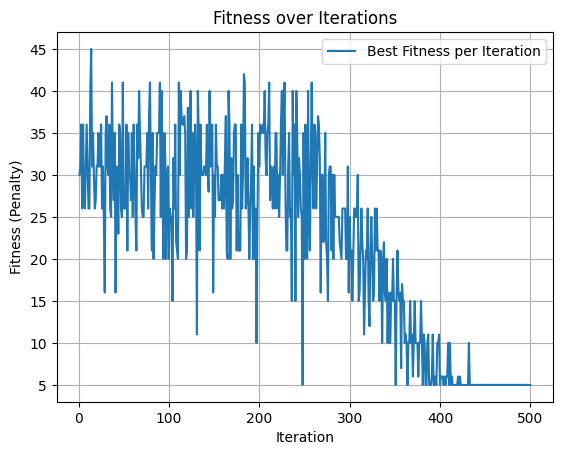


Best Schedule Assignment:
Course: Estructura de Datos, Professor: Noél Perez, Time Slot: 10-11:30, Classroom: Room 3
Course: Programación 2, Professor: Fausto Pasmay, Time Slot: 10-11:30, Classroom: Room 1
Course: Matemáticas discretas, Professor: Eduardo Alba, Time Slot: 17:30-19:00, Classroom: Room 1
Course: Programación en C++, Professor: Pablo Yépez, Time Slot: 8:30-10, Classroom: Room 3
Course: Base de Datos, Professor: Noél Perez, Time Slot: 17:30-19:00, Classroom: Room 2
Course: Redes + lab, Professor: Ricardo Flores, Time Slot: 11:30-13:00, Classroom: Room 4
Course: Programación avanzada en C++, Professor: Fausto Pasmay, Time Slot: 14:30-16:00, Classroom: Room 1
Course: Cybersecurity, Professor: Alejando Proaño, Time Slot: 16:00-17:30, Classroom: Room 3
Course: Sistemas operativos, Professor: Daniel Riofrío, Time Slot: 8:30-10, Classroom: Room 2
Course: Inteligencia Artificial, Professor: Daniel Riofrío, Time Slot: 10-11:30, Classroom: Room 4
Course: Machine learning, Professo

In [1]:
import random
import copy
import matplotlib.pyplot as plt

random.seed(42)
courses = [
    {'name': 'Estructura de Datos', 'professor': 'Noél Perez', 'students': 25},
    {'name': 'Programación 2', 'professor': 'Fausto Pasmay', 'students': 25},
    {'name': 'Matemáticas discretas', 'professor': 'Eduardo Alba', 'students': 25},
    {'name': 'Programación en C++', 'professor': 'Pablo Yépez', 'students': 25},
    {'name': 'Base de Datos', 'professor': 'Noél Perez', 'students': 25},
    {'name': 'Redes + lab', 'professor': 'Ricardo Flores', 'students': 25},
    {'name': 'Programación avanzada en C++', 'professor': 'Fausto Pasmay', 'students': 25},
    {'name': 'Cybersecurity', 'professor': 'Alejando Proaño', 'students': 25},
    {'name': 'Sistemas operativos', 'professor': 'Daniel Riofrío', 'students': 25},
    {'name': 'Inteligencia Artificial', 'professor': 'Daniel Riofrío', 'students': 25},
    {'name': 'Machine learning', 'professor': 'Felipe Grijalva', 'students': 25},
    {'name': 'Organización de computadoras', 'professor': 'Felipe Grijalva', 'students': 25}
]

professors_availability = {
    'Noél Perez':      [True, True, False, False, False, True, True],
    'Fausto Pasmay':   [False, True, True, False, True, False, False],
    'Eduardo Alba':    [True, False, False, True, True, False, True],
    'Pablo Yépez':     [True, True, True, False, False, True, False],
    'Ricardo Flores':  [False, False, True, True, False, True, False],
    'Alejando Proaño': [True, False, True, True, False, True, False],
    'Daniel Riofrío':  [True, True, False, False, True, False, True],
    'Felipe Grijalva': [False, True, False, True, False, True, True]
}

classrooms = [
    {'name': 'Room 1', 'capacity': 25},
    {'name': 'Room 2', 'capacity': 25},
    {'name': 'Room 3', 'capacity': 25},
    {'name': 'Room 4', 'capacity': 25},
    {'name': 'Room 5', 'capacity': 25}
]

time_slots = ['8:30-10', '10-11:30', '11:30-13:00', '13:00-14:30', '14:30-16:00', '16:00-17:30', '17:30-19:00']
num_wolves = 100
max_iter = 500

def initialize_population():
    population = []
    for _ in range(num_wolves):
        solution = []
        for course in courses:
            time_slot = random.randint(0, len(time_slots)-1)
            classroom = random.randint(0, len(classrooms)-1)
            professor = course['professor']  # Añadimos el profesor a la asignación
            solution.append({
                'course': course['name'],
                'professor': professor,
                'time_slot': time_slot,
                'classroom': classroom
            })
        population.append(solution)
    return population

def fitness(solution):
    penalty = 0
    schedule = {}
    professor_schedule = {}
    student_schedule = {}

    for assignment in solution:
        course_name = assignment['course']
        time_slot = assignment['time_slot']
        classroom = classrooms[assignment['classroom']]
        professor = assignment['professor']
        course = next(course for course in courses if course['name'] == course_name)
        students = course['students']

        if not professors_availability[professor][time_slot]:
            penalty += 10
        else:
            if professor in professor_schedule and time_slot in professor_schedule[professor]:
                penalty += 5
            else:
                professor_schedule.setdefault(professor, []).append(time_slot)

        if students > classroom['capacity']:
            penalty += 5

        if classroom['name'] in schedule and time_slot in schedule[classroom['name']]:
            penalty += 5
        else:
            schedule.setdefault(classroom['name'], []).append(time_slot)

        if time_slot in student_schedule:
            penalty += 1
        else:
            student_schedule[time_slot] = True

    return penalty

def sort_population(population):
    population.sort(key=lambda sol: fitness(sol))

def update_positions(alpha, beta, delta, population, a):
    new_population = []
    for solution in population:
        new_solution = []
        for i in range(len(solution)):
            choices = [alpha[i]['time_slot'], beta[i]['time_slot'], delta[i]['time_slot']]
            probabilities = [0.4, 0.3, 0.3]
            if random.random() < a:
                new_time_slot = random.randint(0, len(time_slots)-1)
            else:
                new_time_slot = random.choices(choices, probabilities)[0]

            choices = [alpha[i]['classroom'], beta[i]['classroom'], delta[i]['classroom']]
            if random.random() < a:
                new_classroom = random.randint(0, len(classrooms)-1)
            else:
                new_classroom = random.choices(choices, probabilities)[0]

            professor = solution[i]['professor']  # Mantenemos el profesor de la asignación actual

            new_assignment = {
                'course': solution[i]['course'],
                'professor': professor,
                'time_slot': new_time_slot,
                'classroom': new_classroom
            }
            new_solution.append(new_assignment)
        new_population.append(new_solution)
    return new_population

def GWO():
    population = initialize_population()
    sort_population(population)

    alpha = copy.deepcopy(population[0])
    beta = copy.deepcopy(population[1])
    delta = copy.deepcopy(population[2])

    fitness_values = []
    for iter in range(max_iter):
        a = 2 - iter * (2 / max_iter)
        population = update_positions(alpha, beta, delta, population, a)
        sort_population(population)
        current_alpha_fitness = fitness(population[0])
        fitness_values.append(current_alpha_fitness)
        if current_alpha_fitness < fitness(alpha):
            alpha = copy.deepcopy(population[0])
        if fitness(population[1]) < fitness(beta):
            beta = copy.deepcopy(population[1])
        if fitness(population[2]) < fitness(delta):
            delta = copy.deepcopy(population[2])

        print(f"Iteration {iter+1}, Best Fitness: {fitness(alpha)}")

        if fitness(alpha) == 0:
            print("Optimal solution found.")
            break
    plt.plot(range(1, len(fitness_values)+1), fitness_values, label='Best Fitness per Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness (Penalty)')
    plt.title('Fitness over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()
    return alpha

def check_conflicts(solution):
    schedule = {}
    professor_schedule = {}
    student_schedule = {}
    conflicts = []

    for assignment in solution:
        course_name = assignment['course']
        time_slot_index = assignment['time_slot']
        time_slot = time_slots[time_slot_index]
        classroom = classrooms[assignment['classroom']]
        professor = assignment['professor']
        course = next(course for course in courses if course['name'] == course_name)
        students = course['students']

        if not professors_availability[professor][time_slot_index]:
            conflicts.append(f"El profesor {professor} no está disponible en el horario {time_slot} para el curso {course_name}.")
        else:
            if professor in professor_schedule and time_slot_index in professor_schedule[professor]:
                conflicts.append(f"El profesor {professor} tiene múltiples cursos en el horario {time_slot}.")
            else:
                professor_schedule.setdefault(professor, []).append(time_slot_index)

        if students > classroom['capacity']:
            conflicts.append(f"El aula {classroom['name']} no tiene suficiente capacidad para el curso {course_name}.")

        if classroom['name'] in schedule and time_slot_index in schedule[classroom['name']]:
            conflicts.append(f"El aula {classroom['name']} está doblemente asignada en el horario {time_slot}.")
        else:
            schedule.setdefault(classroom['name'], []).append(time_slot_index)

        if time_slot_index in student_schedule:
            conflicts.append(f"Los estudiantes tienen múltiples cursos en el horario {time_slot}.")
        else:
            student_schedule[time_slot_index] = course_name

    return conflicts

best_solution = GWO()

print("\nBest Schedule Assignment:")
for assignment in best_solution:
    course_name = assignment['course']
    professor = assignment['professor']
    time_slot = time_slots[assignment['time_slot']]
    classroom = classrooms[assignment['classroom']]['name']
    print(f"Course: {course_name}, Professor: {professor}, Time Slot: {time_slot}, Classroom: {classroom}")
print("Fitness:", fitness(best_solution))
conflicts = check_conflicts(best_solution)
if conflicts:
    print("\nConflicts in the Best Schedule:")
    for conflict in conflicts:
        print(conflict)
else:
    print("\nNo conflicts in the Best Schedule.")